In [21]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as pl
%matplotlib inline

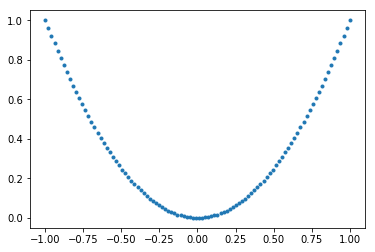

In [22]:
# Build training data
x = np.linspace(-1, 1, 100)
y = x * x
pl.plot(x, y, '.');

In [59]:
# Build a tensorflow model
class N():
    pass
model = N()
model.x = tf.placeholder(tf.float32, (None, 1))
model.ref = tf.placeholder(tf.float32, (None, 1))
model.L1 = tf.layers.dense(inputs=model.x, units=100, activation=tf.nn.relu)
model.L2 = tf.layers.dense(inputs=model.L1, units=100, activation=tf.nn.relu)
model.y = tf.layers.dense(inputs=model.L2, units=1, activation=None)
model.cost = tf.reduce_mean(tf.pow(model.y - model.ref, 2))

In [60]:
# Setup the session and optimizer
optimizer = tf.train.GradientDescentOptimizer(0.01).minimize(model.cost)
s = tf.Session()
s.run(tf.global_variables_initializer())

In [61]:
feed = {model.x: x.reshape(-1, 1), model.ref: y.reshape(-1, 1)}

In [62]:
s.run(model.cost, feed)

0.19039701

In [63]:
for i in range(000):
    s.run(optimizer, feed)

In [64]:
yout = s.run(model.y, feed)

In [65]:
out = yout.reshape(-1)

In [66]:
out.shape

(100,)

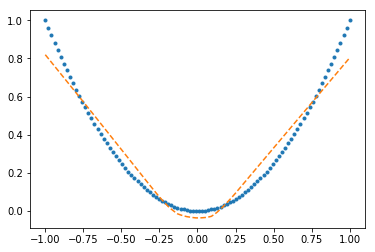

In [67]:
pl.plot(x, y, '.', x, yout, '--')